<a href="https://colab.research.google.com/github/albinwan/general-assembly-projects/blob/main/Copy_of_02_EDA_and_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# IMPORTS
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.stats import ttest_ind

from datetime import datetime
from datetime import timedelta

from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# some matplotlib params to make the defaults a bit more readable
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [ ]:
# Reading in all data
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
weather = pd.read_csv('/content/weather.csv')
spray = pd.read_csv('/content/spray.csv')

In [ ]:
print("test shape", test.shape)
print("train shape", train.shape)
print("weather shape", weather.shape)
print("spray shape", spray.shape)

test shape (116293, 34)
train shape (8475, 35)
weather shape (1472, 27)
spray shape (14294, 4)


In [ ]:
train.head()

,Date,Trap,Latitude,Longitude,Species,Block,AddressAccuracy,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Heat/Cool,sunset,sunrise,SunHours,isRainy,has_Rain,Humidity,Tavg_lag1_r18,AvgSpeed_lag1_r22,SunHours_lag24_r4,Humidity_r28
0,2007-05-29,T002,41.954690,-87.800991,CULEX PIPIENS/RESTUANS,41,9,1,0,88,62.5,75.25,10.0,58,65.0,421,1917,BR HZ,0.51,29.415,30.11,5.8,18,6.5,10.25,2007-05-29 19:17:00,2007-05-29 04:21:00,896.0,0,0,55.05,63.573529,10.068182,846.5,51.712143
1,2007-05-29,T002,41.954690,-87.800991,CULEX RESTUANS,41,9,1,0,88,62.5,75.25,10.0,58,65.0,421,1917,BR HZ,0.51,29.415,30.11,5.8,18,6.5,10.25,2007-05-29 19:17:00,2007-05-29 04:21:00,896.0,0,0,55.05,63.573529,10.068182,846.5,51.712143
2,2007-05-29,T007,41.994991,-87.769279,CULEX RESTUANS,62,9,1,0,88,62.5,75.25,10.0,58,65.0,421,1917,BR HZ,0.51,29.415,30.11,5.8,18,6.5,10.25,2007-05-29 19:17:00,2007-05-29 04:21:00,896.0,0,0,55.05,63.573529,10.068182,846.5,51.712143
3,2007-05-29,T015,41.974089,-87.824812,CULEX PIPIENS/RESTUANS,79,8,1,0,88,62.5,75.25,10.0,58,65.0,421,1917,BR HZ,0.51,29.415,30.11,5.8,18,6.5,10.25,2007-05-29 19:17:00,2007-05-29 04:21:00,896.0,0,0,55.05,63.573529,10.068182,846.5,51.712143
4,2007-05-29,T015,41.974089,-87.824812,CULEX RESTUANS,79,8,4,0,88,62.5,75.25,10.0,58,65.0,421,1917,BR HZ,0.51,29.415,30.11,5.8,18,6.5,10.25,2007-05-29 19:17:00,2007-05-29 04:21:00,896.0,0,0,55.05,63.573529,10.068182,846.5,51.712143


# Split to train/validation sets and impute

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train['mth-year']= train['Date'].dt.strftime('%m-%Y')
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
X = train.drop(columns=['WnvPresent'])
y = train['WnvPresent']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Merge `WnvPresent` back for EDA purposes

In [ ]:
X_train_EDA = X_train.copy()

In [ ]:
X_train_EDA['WnvPresent'] = y_train

In [ ]:
X_train_EDA.head()

,Date,Trap,Latitude,Longitude,Species,Block,AddressAccuracy,NumMosquitos,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Heat/Cool,sunset,sunrise,SunHours,isRainy,has_Rain,Humidity,Tavg_lag1_r18,AvgSpeed_lag1_r22,SunHours_lag24_r4,Humidity_r28,mth-year,Year,Month,Week,WnvPresent
8074,2013-09-06,T048,41.867108,-87.654224,CULEX PIPIENS,11,8,12,86,59.5,72.75,5.0,58,64.0,522,1819,,0.52,29.410,30.11,4.7,20,6.0,7.75,2013-09-06 18:19:00,2013-09-06 05:22:00,777.0,0,0,59.86,75.617647,7.290909,842.75,64.035000,09-2013,2013,9,36,0
5548,2011-08-05,T030,41.899230,-87.716788,CULEX RESTUANS,10,9,3,83,69.5,76.25,3.0,68,71.0,449,1907,RA,2.00,29.235,29.93,4.0,5,5.5,11.25,2011-08-05 19:07:00,2011-08-05 04:49:00,858.0,1,0,75.66,81.044118,7.100000,902.75,64.710357,08-2011,2011,8,31,0
4685,2009-10-01,T900,41.974689,-87.890615,CULEX PIPIENS,10,9,3,59,42.5,50.75,-8.0,46,49.0,548,1734,RA BR,0.03,29.155,29.90,9.1,13,9.5,-14.25,2009-10-01 17:34:00,2009-10-01 05:48:00,706.0,1,1,83.71,64.235294,6.986364,778.25,70.526071,10-2009,2009,10,40,0
5576,2011-08-05,T080,41.754676,-87.612922,CULEX PIPIENS/RESTUANS,77,9,7,83,69.5,76.25,3.0,68,71.0,449,1907,RA,2.00,29.235,29.93,4.0,5,5.5,11.25,2011-08-05 19:07:00,2011-08-05 04:49:00,858.0,1,0,75.66,81.044118,7.100000,902.75,64.710357,08-2011,2011,8,31,0
323,2007-07-11,T048,41.867108,-87.654224,CULEX PIPIENS/RESTUANS,11,8,3,77,62.5,69.75,-3.0,51,59.0,426,1928,,1.23,29.255,29.93,8.8,30,10.9,4.75,2007-07-11 19:28:00,2007-07-11 04:26:00,902.0,0,0,51.35,74.750000,8.759091,912.50,58.623929,07-2007,2007,7,28,0


In [ ]:
X_train.isnull().sum().sort_values(ascending=False).head(6)

StnPressure    54
Tmin            0
CodeSum         0
Sunset          0
Sunrise         0
WetBulb         0
dtype: int64

In [ ]:
X_train['StnPressure'].fillna(X_train['StnPressure'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Impute validation and test set with values from train set in order to prevent data leakage

In [ ]:
X_val['StnPressure'].fillna(X_train['StnPressure'].median(), inplace=True)
test['StnPressure'].fillna(X_train['StnPressure'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# EDA

In [ ]:
for col in X_train:
    print(f'{col} column count of unique values: {len(train[col].unique())}')

Date column count of unique values: 95
Trap column count of unique values: 136
Latitude column count of unique values: 138
Longitude column count of unique values: 138
Species column count of unique values: 7
Block column count of unique values: 160
AddressAccuracy column count of unique values: 50
NumMosquitos column count of unique values: 232
Tmax column count of unique values: 33
Tmin column count of unique values: 48
Tavg column count of unique values: 64
Depart column count of unique values: 28
DewPoint column count of unique values: 32
WetBulb column count of unique values: 31
Sunrise column count of unique values: 62
Sunset column count of unique values: 58
CodeSum column count of unique values: 19
PrecipTotal column count of unique values: 88
StnPressure column count of unique values: 59
SeaLevel column count of unique values: 41
ResultSpeed column count of unique values: 62
ResultDir column count of unique values: 34
AvgSpeed column count of unique values: 61
Heat/Cool column

In [ ]:
X_train.dtypes

Date                 datetime64[ns]
Trap                         object
Latitude                    float64
Longitude                   float64
Species                      object
Block                         int64
AddressAccuracy               int64
NumMosquitos                  int64
Tmax                          int64
Tmin                        float64
Tavg                        float64
Depart                      float64
DewPoint                      int64
WetBulb                     float64
Sunrise                       int64
Sunset                        int64
CodeSum                      object
PrecipTotal                 float64
StnPressure                 float64
SeaLevel                    float64
ResultSpeed                 float64
ResultDir                     int64
AvgSpeed                    float64
Heat/Cool                   float64
sunset                       object
sunrise                      object
SunHours                    float64
isRainy                     

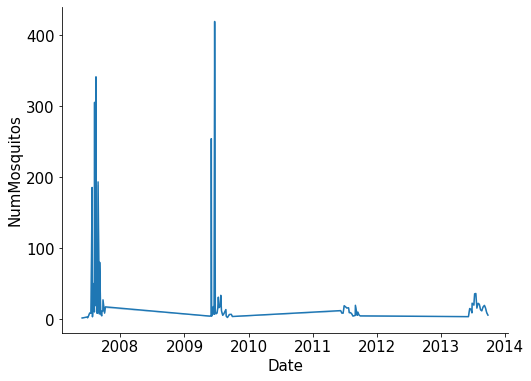

In [ ]:
sns.lineplot(x = "Date", y = "NumMosquitos", data = X_train, ci=False);
# noticed that the spikes are because the 

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,5678.0,41.845055,0.106624,41.644612,41.750498,41.862292,41.944869,42.017430
Longitude,5678.0,-87.694506,0.084245,-87.930995,-87.752411,-87.694991,-87.642984,-87.531635
Block,5678.0,44.176647,34.935900,10.000000,17.000000,39.000000,61.000000,540.000000
AddressAccuracy,5678.0,9.609898,9.738965,3.000000,8.000000,8.000000,9.000000,306.000000
NumMosquitos,5678.0,15.340085,65.413410,1.000000,2.000000,4.000000,11.000000,2207.000000
Tmax,5678.0,81.280733,8.338156,57.000000,78.000000,83.000000,87.000000,96.000000
Tmin,5678.0,63.143625,7.589431,42.500000,59.000000,64.500000,69.000000,77.500000
Tavg,5678.0,72.212179,7.499392,50.750000,68.000000,73.500000,78.000000,84.750000
Depart,5678.0,2.497534,6.611005,-12.000000,-2.000000,3.500000,7.000000,18.000000
DewPoint,5678.0,59.422860,7.899890,39.000000,54.000000,59.000000,67.000000,73.000000


## Number of mosquitoes

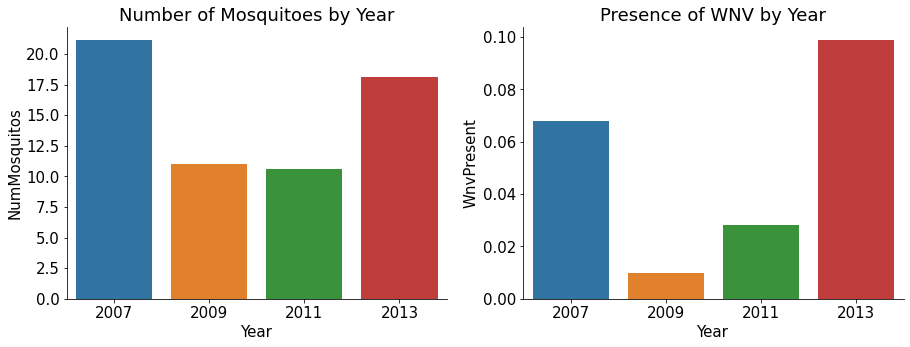

In [ ]:
#lineplot based on dates
fig, axes = plt.subplots(1, 2, figsize=(15, 5));

sns.barplot(ax=axes[0], x = 'Year', y= 'NumMosquitos', data=train, ci=False);
axes[0].set_title("Number of Mosquitoes by Year");


sns.barplot(ax=axes[1], x = 'Year', y= 'WnvPresent', data=train, ci=False);
axes[1].set_title("Presence of WNV by Year");

In [ ]:
#lineplot based on week of year
#this is the no of datapoints per week of year
#train.Date.dt.week.hist();

#####plot west nile over this plot

## Species

In [ ]:
species_eda = X_train_EDA[['Species', 'NumMosquitos', 'WnvPresent']].groupby('Species').sum()
species_eda['WnvPresent_Pct'] = species_eda['WnvPresent'] / species_eda['NumMosquitos'] * 100
species_eda = species_eda.sort_values(by='WnvPresent', ascending=False)

In [ ]:
species_eda

,NumMosquitos,WnvPresent,WnvPresent_Pct
Species,,,
CULEX PIPIENS/RESTUANS,45309,146,0.322232
CULEX PIPIENS,25768,127,0.492859
CULEX RESTUANS,15625,33,0.211200
CULEX ERRATICUS,7,0,0.000000
CULEX SALINARIUS,97,0,0.000000
CULEX TARSALIS,2,0,0.000000
CULEX TERRITANS,293,0,0.000000


Text(0.5, 0, 'Count')

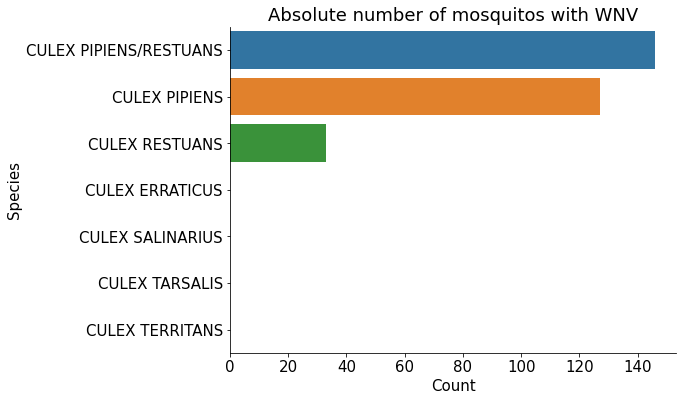

In [ ]:
sns.barplot(data=species_eda, y=species_eda.index, x=species_eda['WnvPresent'], orient='h')
plt.title('Absolute number of mosquitos with WNV')
plt.xlabel('Count')

Text(0.5, 0, 'Percent')

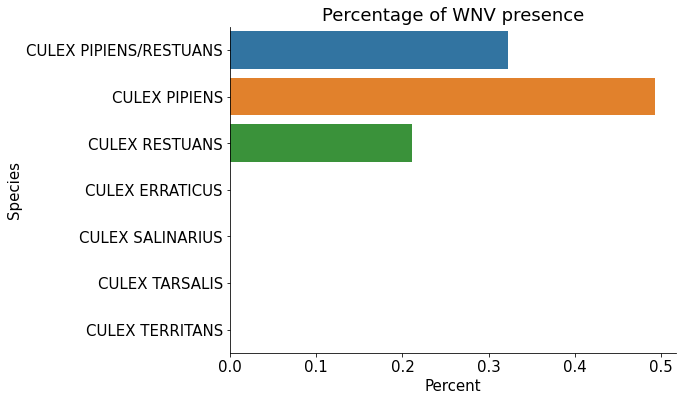

In [ ]:
sns.barplot(data=species_eda, y=species_eda.index, x=species_eda['WnvPresent_Pct'], orient='h')
plt.title('Percentage of WNV presence')
plt.xlabel('Percent')

(0.0, 200.0)

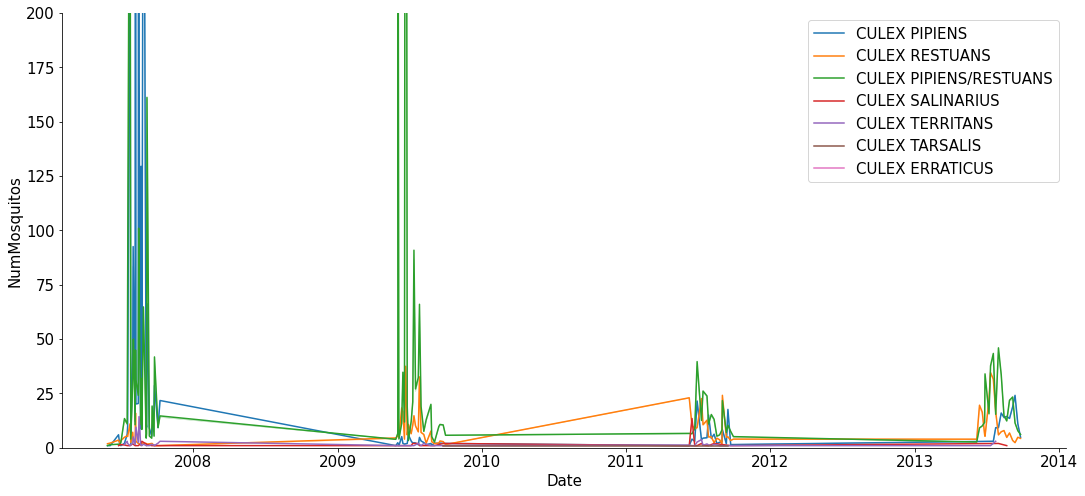

In [ ]:
# lineplot by 'Species'
plt.figure(figsize=(18,8))
sns.lineplot(x = "Date", y = "NumMosquitos", data = X_train_EDA, ci=False, hue='Species');
plt.legend()

plt.ylim(0, 200)

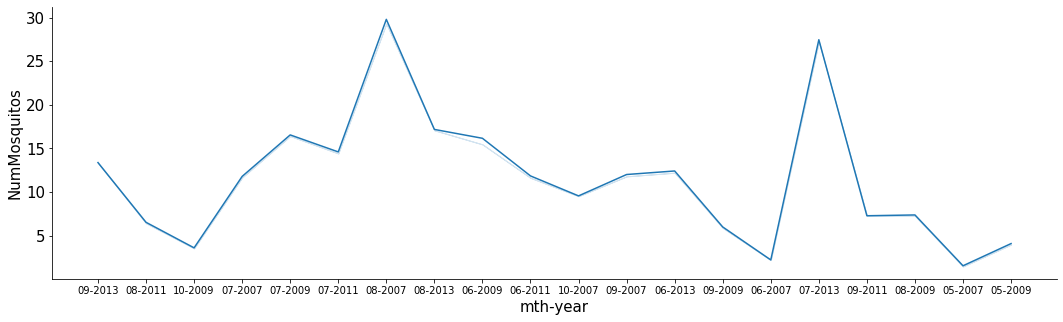

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = X_train_EDA, ci=False)
plt.xticks(fontsize=10);
#need to reduce the tick size... no space lol

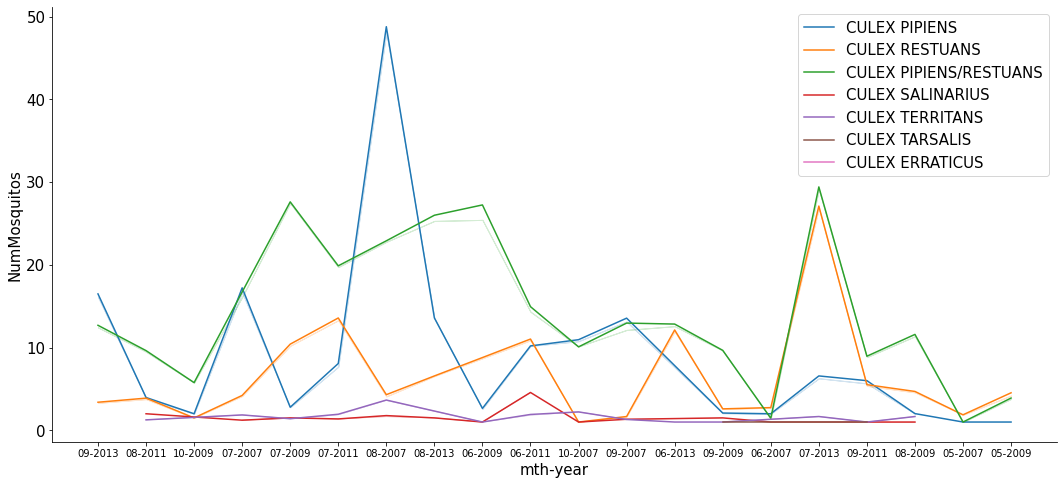

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = X_train_EDA, ci=False, hue='Species')
plt.legend()
plt.xticks(fontsize=10);
# can start to observe that the number of mosquitoes are different for different location

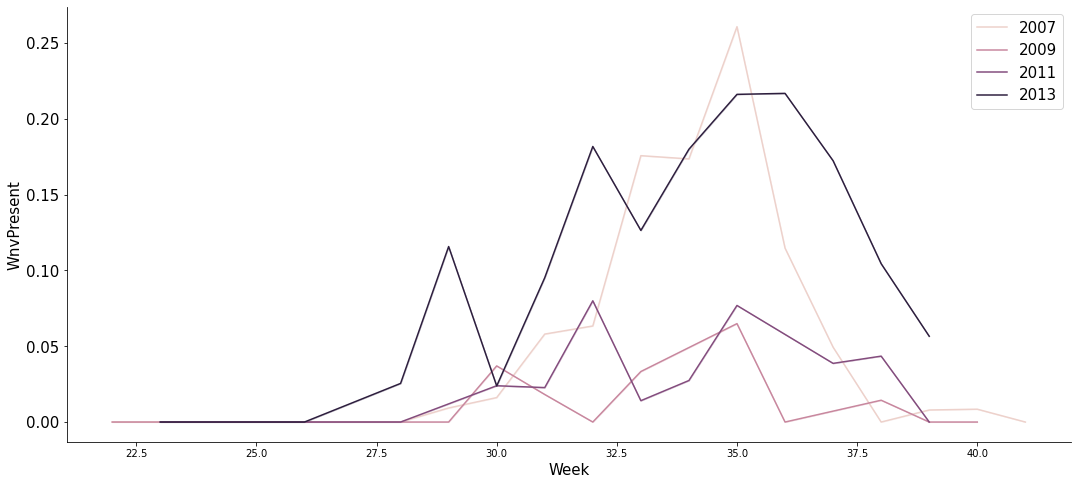

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "Week", y = "WnvPresent", data = X_train_EDA, ci=False, hue='Year')
plt.legend()
plt.xticks(fontsize=10);

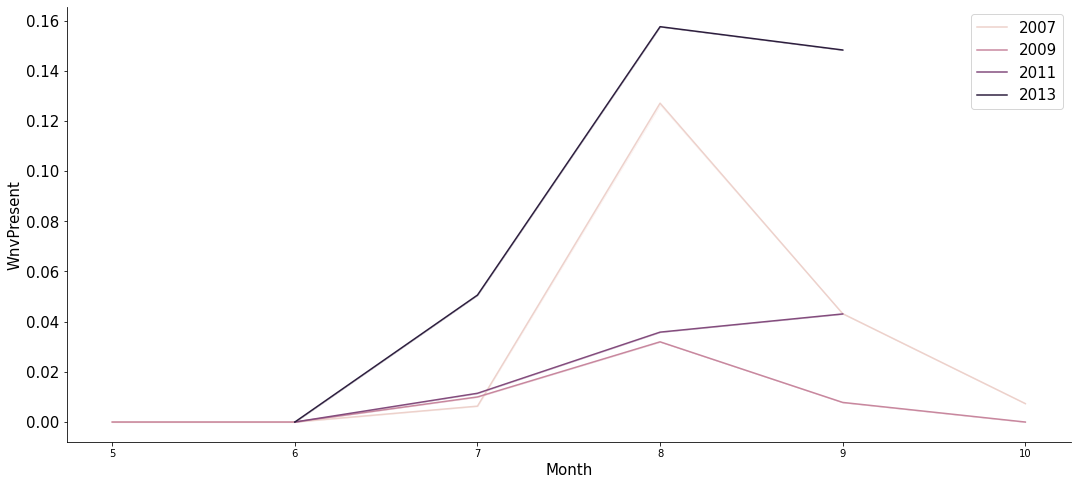

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "Month", y = "WnvPresent", data = X_train_EDA, ci=False, hue='Year')
plt.legend()
plt.xticks(fontsize=10);

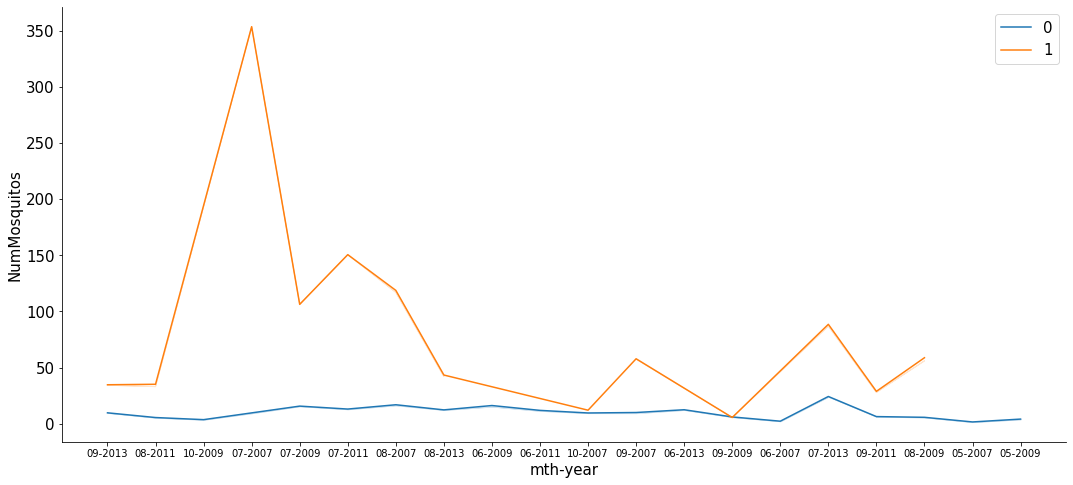

In [ ]:
# hue = 'WnvPresent'

plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = X_train_EDA, ci=False, hue='WnvPresent')
plt.legend()
plt.xticks(fontsize=10);
# can start to observe that the number of mosquitoes are different for different location

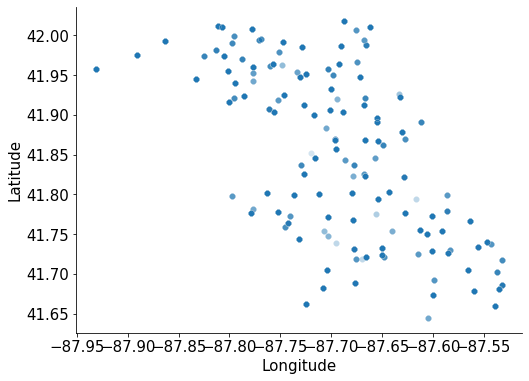

In [ ]:
# decided to plot the scatter plot latitude, y=longitude

sns.scatterplot(data=X_train_EDA, x="Longitude", y="Latitude", alpha=0.1, )

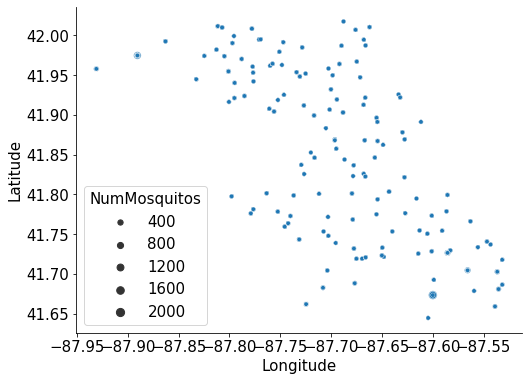

In [ ]:
# exploring the size keyword, bigger size means more mosquitoes at the Latitude,Longitude
sns.scatterplot(data=X_train_EDA, x="Longitude", y="Latitude", size='NumMosquitos');

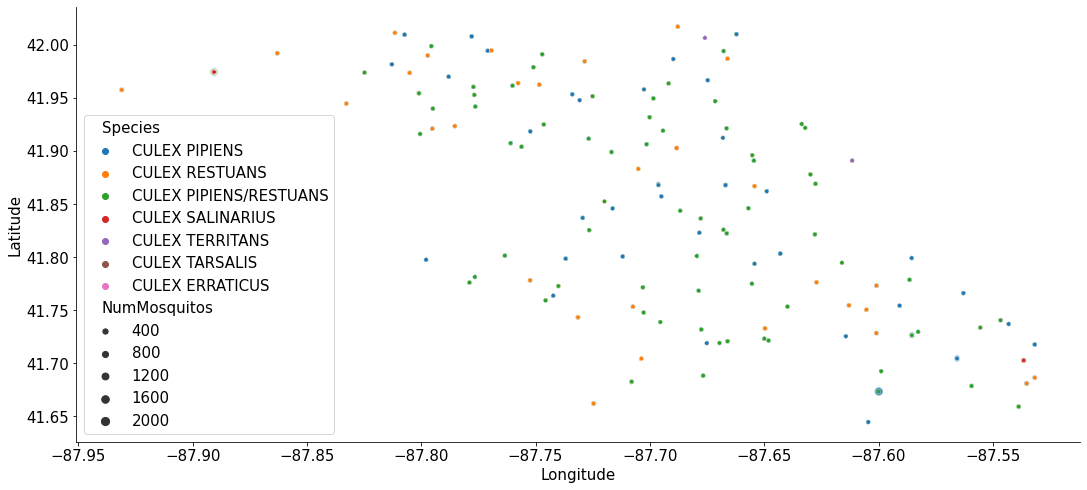

In [ ]:
# this plot rather confusing and hard to intepret as different species can be in the same latitude/longitude
plt.figure(figsize=(18,8))
sns.scatterplot(data=X_train_EDA, x="Longitude", y="Latitude", size='NumMosquitos', hue='Species')

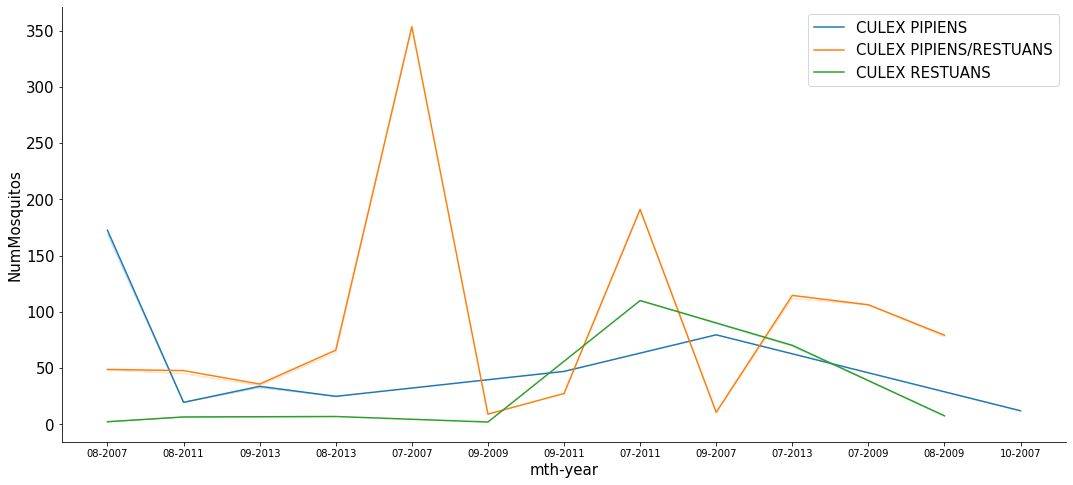

In [ ]:
wnv_present = X_train_EDA[X_train_EDA['WnvPresent']==1]

plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = wnv_present, ci=False, hue='Species')
plt.legend()
plt.xticks(fontsize=10);
##Q:
#can we drop those 0 values and label encode??


No handles with labels found to put in legend.


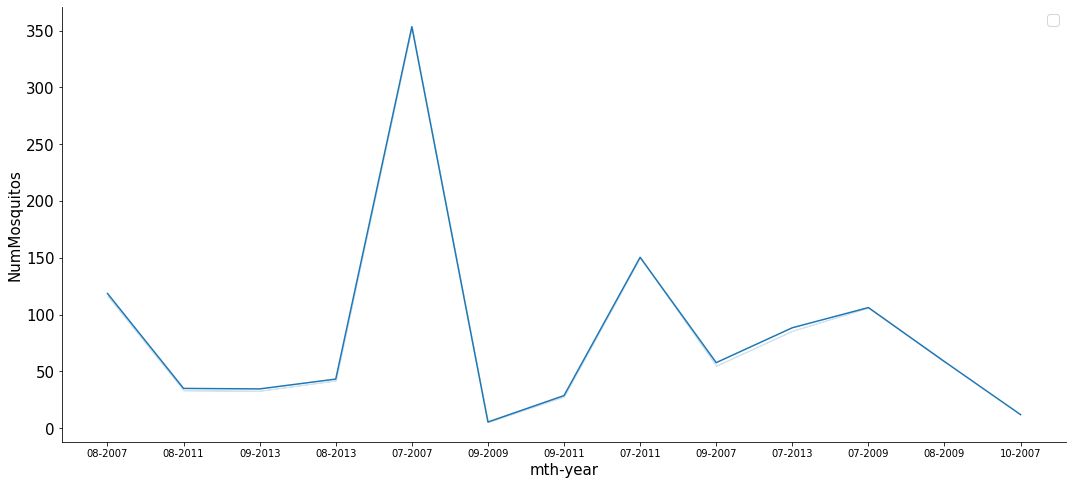

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x = "mth-year", y = "NumMosquitos", data = wnv_present, ci=False)
plt.legend()
plt.xticks(fontsize=10);

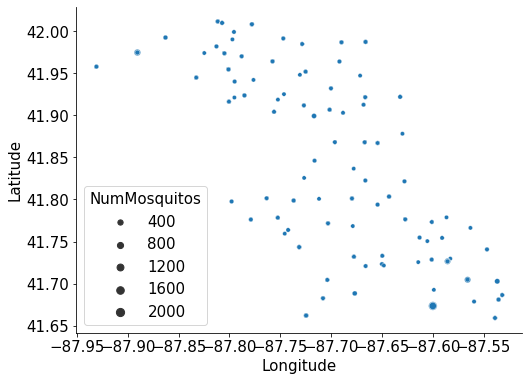

In [ ]:
sns.scatterplot(data=wnv_present, x="Longitude", y="Latitude", size='NumMosquitos');

## Daphne EDA

In [ ]:
# count of traps with 'wnv' as hue

trap_table = pd.DataFrame(X_train_EDA.groupby(['mth-year','WnvPresent' ])['Trap'].count())
trap_table['Trap'].mean()

172.06060606060606

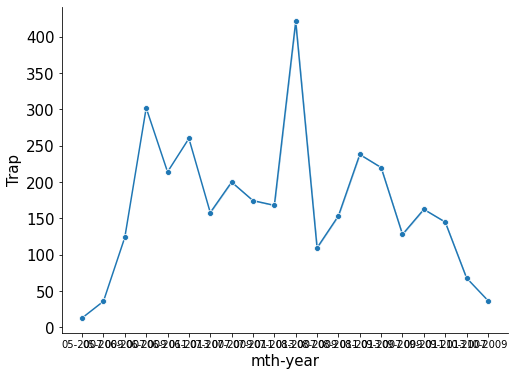

In [ ]:
sns.lineplot(x = "mth-year", y = 'Trap' , data = trap_table, ci=False, marker='o');
plt.xticks(fontsize=10);

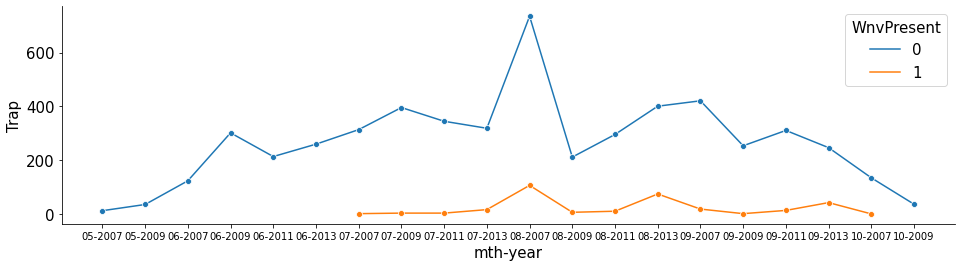

In [ ]:
# count of traps with 'wnv' as hue
plt.figure(figsize=(16,4))
trap_table = pd.DataFrame(X_train_EDA.groupby(['mth-year','WnvPresent' ])['Trap'].count())
trap_table

sns.lineplot(x = "mth-year", y = 'Trap' , data = trap_table, ci=False, hue = 'WnvPresent', marker='o');
plt.xticks(fontsize=10);

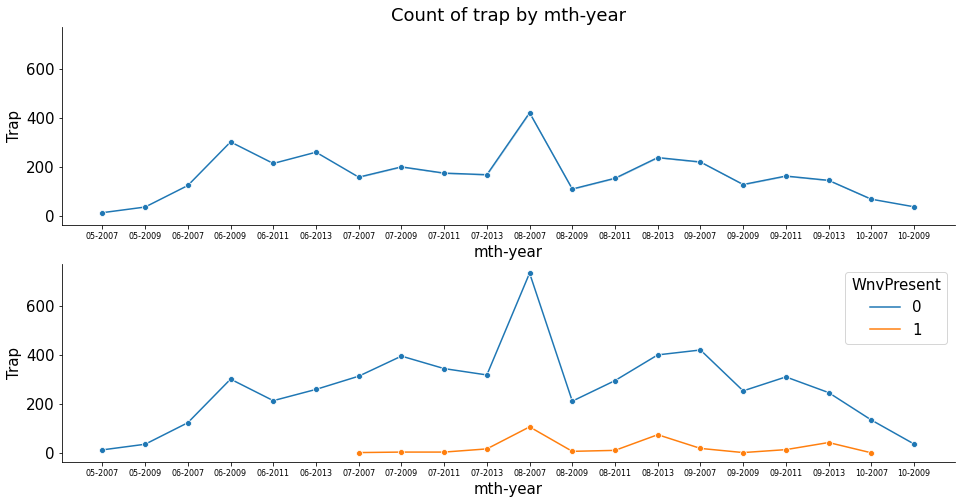

In [ ]:
## this is the same as the 2 above, they are the subplot version...
## probably for presentation?

#lineplot based on dates
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharey=True);

sns.lineplot(ax=axes[0], x = 'mth-year', y= 'Trap', data=trap_table, ci=False,  marker='o');
axes[0].set_title("Count of trap by mth-year");
#axes[0].tick_params(axis='x', which='minor', labelsize=8)
axes[0].xaxis.set_tick_params(labelsize=8)


sns.lineplot(ax=axes[1], x = 'mth-year', y= 'Trap', data=trap_table, ci=False, hue = 'WnvPresent', marker='o');
#axes[1].set_title("Count of trap by mth-year");
axes[1].xaxis.set_tick_params(labelsize=8)

- from May 2007 to October 2009 (**Note: with time gaps**)there are traps placed in Chicago to capture mosquitoes.
- Not all of the traps placed captured mosquitoes with WNV, with increase in traps, there will be increase in traps with WNV mosquitoes


## Latitude and Longitude

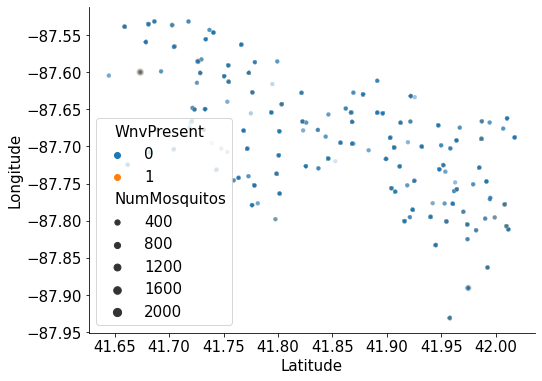

In [ ]:
# decided to plot the scatter plot latitude, y=longitude

sns.scatterplot(data=X_train_EDA,x="Latitude", y="Longitude",alpha=0.1, hue='WnvPresent', size='NumMosquitos');

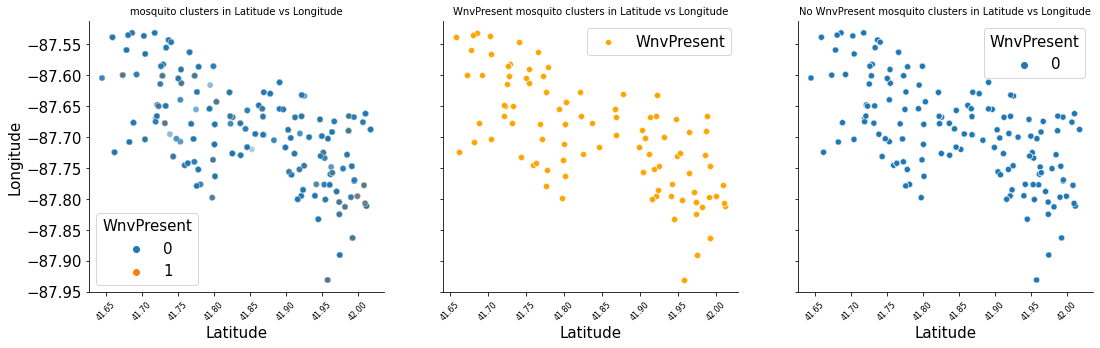

In [ ]:
wnv_only = X_train_EDA[X_train_EDA['WnvPresent']==1]
no_wnv_only = X_train_EDA[X_train_EDA['WnvPresent']==0]

#scatterplot based on dates
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True);

sns.scatterplot(ax=axes[0], x="Latitude", y="Longitude", data=X_train_EDA, ci=False, hue='WnvPresent', alpha=0.2, color='green');
axes[0].set_title("mosquito clusters in Latitude vs Longitude", fontsize=10);
axes[0].xaxis.set_tick_params(labelsize=8, rotation=45)

sns.scatterplot(ax=axes[1], x="Latitude", y="Longitude", data=wnv_only, ci=False,color='orange', label='WnvPresent');
axes[1].set_title("WnvPresent mosquito clusters in Latitude vs Longitude",fontsize=10);
axes[1].xaxis.set_tick_params(labelsize=8, rotation=45)

sns.scatterplot(ax=axes[2], x="Latitude", y="Longitude", data=no_wnv_only, ci=False,color='green', hue='WnvPresent');
axes[2].set_title("No WnvPresent mosquito clusters in Latitude vs Longitude",fontsize=10);
axes[2].xaxis.set_tick_params(labelsize=8, rotation=45)

**Note**: i was trying to plot to show that breeding clusters for wnv and wnv not present are different based on Latitude and Longitude, but they are the same???
- From this above plot, we are unable to observe if there are any obvious hotspot for mosquitoes with WNV.
- this could be because breeding spots for mosquitoes with WNV are same with without WNV 

In [ ]:
X_train_EDA['WnvPresent'].value_counts()

0    5372
1     306
Name: WnvPresent, dtype: int64

In [ ]:
pct_wnv_train = round(X_train_EDA['WnvPresent'].value_counts()[1]/ len(X_train)*100, 4)

print(f" {pct_wnv_train}% of the dataset has observations with West Nile Virus ")

 5.3892% of the dataset has observations with West Nile Virus 


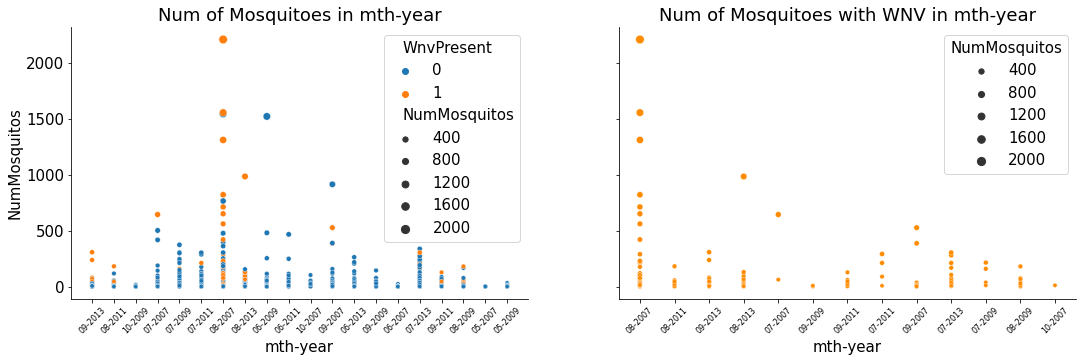

In [ ]:
#scatterplot based on dates
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True);

sns.scatterplot(ax=axes[0], x = 'mth-year', y= 'NumMosquitos', data=X_train_EDA, ci=False, hue='WnvPresent', size='NumMosquitos' );
axes[0].set_title("Num of Mosquitoes in mth-year");
axes[0].xaxis.set_tick_params(labelsize=8, rotation=45)


sns.scatterplot(ax=axes[1], x = 'mth-year', y= 'NumMosquitos', data=wnv_only, ci=False, size='NumMosquitos', color='darkorange');
axes[1].set_title("Num of Mosquitoes with WNV in mth-year");
axes[1].xaxis.set_tick_params(labelsize=8, rotation=45)

- the left subplots are the datapoints of mosquitoes with and without Wnv Present, but there is overlapping plot
- the right subplot are datapoint of mosquitoes only with Wnv Present. 
- We can observe there is highest incidences of mosquito clusters with Wnv in August 2007 based on this 
- thinking of doing a total sum of mosquitoes plot like the other group

## Total count of mosquitos Observed
- then hue by 'Wnv Present'

In [ ]:
mthyr_table = X_train_EDA.groupby(['mth-year']).sum()

In [ ]:
# thought of doing this, but not sure how to plot
# probably abandon this
latlong_table = pd.DataFrame(X_train_EDA.groupby(["Latitude", "Longitude",'WnvPresent'])[[ 'NumMosquitos']].mean())
latlong_table

NumMosquitos
Latitude  Longitude  WnvPresent              
41.644612 -87.604498 0               9.888889
41.659112 -87.538693 0              16.704918
                     1              50.000000
41.662014 -87.724608 0              18.053763
                     1              88.800000
41.673408 -87.599862 0              66.658824
                     1             917.428571
41.678618 -87.559308 0              11.647059
                     1              52.000000
41.680946 -87.535198 0              19.044118
                     1             116.000000
41.682587 -87.707973 0              20.896104
                     1              55.750000
41.686398 -87.531635 0              18.040000
                     1              48.333333
41.688324 -87.676709 0              23.370370
                     1              67.666667
41.692555 -87.598865 0               3.666667
                     1               7.000000
41.702724 -87.536497 0              66.750000
                     1             184.666667
41.704336 -87.703736 0               5.890909
                     1              12.500000
41.704572 -87.565666 0              16.280488
                     1             257.000000
41.717753 -87.531657 0               9.875000
41.719059 -87.675088 0               4.153846
41.719140 -87.669539 0              11.666667
41.720848 -87.666014 0              11.111111
                     1              16.000000
41.721474 -87.648064 0               5.500000
                     1               4.000000
41.723195 -87.649970 0               3.898305
                     1               5.000000
41.725517 -87.614258 0               2.818182
                     1               7.000000
41.726465 -87.585413 0              31.328947
                     1             476.000000
41.728495 -87.600963 0              18.697674
                     1              22.000000
41.729669 -87.582699 0               4.000000
                     1               4.000000
41.731922 -87.677512 0              11.384615
                     1              35.600000
41.732984 -87.649642 0              11.041667
                     1              42.000000
41.733643 -87.555510 0               3.258065
41.737052 -87.543067 0               2.692308
41.738903 -87.695443 0               6.000000
41.740641 -87.546587 0               7.758242
                     1              39.000000
41.743402 -87.731435 0              24.536585
                     1              88.200000
41.747850 -87.702716 0               2.000000
41.750498 -87.605294 0               8.844156
                     1               5.000000
41.753391 -87.707394 0               5.500000
41.753411 -87.639817 0               3.500000
41.754292 -87.590773 0               5.305556
                     1              11.500000
41.754676 -87.612922 0               5.508475
                     1              22.000000
41.759346 -87.745602 0               9.571429
                     1              16.000000
41.763733 -87.742302 0               3.555556
                     1              18.500000
41.766202 -87.562889 0               4.433962
                     1              18.000000
41.768388 -87.678649 0               6.137931
                     1              17.000000
41.771660 -87.703047 0              10.681159
                     1              39.200000
41.772846 -87.740029 0               2.846154
41.773215 -87.600880 0               6.283951
                     1               9.000000
41.775051 -87.655356 0               3.750000
41.776156 -87.778927 0               5.818182
                     1              22.000000
41.776428 -87.627096 0               8.424242
                     1              18.400000
41.778297 -87.752411 0               9.742424
                     1              27.500000
41.778748 -87.586427 0               1.761905
                     1               1.000000
41.781416 -87.776532 0               3.777778
41.793818 -87.654234 0         

## Spray

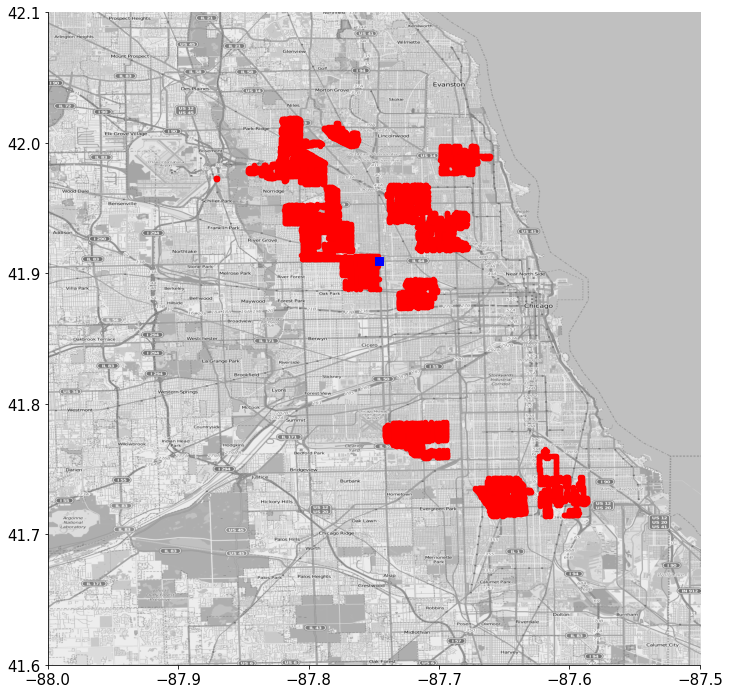

In [ ]:
origin = [41.6, -88.0] 
upperRight = [42.1, -87.5]

mapdata = np.loadtxt("/content/mapdata_copyright_openstreetmap_contributors.txt")

numPoints = 50
long_nooutlier = spray[spray['Longitude'] > -88]
lats = long_nooutlier['Latitude']
longs = long_nooutlier['Longitude']

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth

plt.figure(figsize=(12,12))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs, y=lats, c='r', s=20)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s');

### Checking where spray & train overlap:

In [ ]:
#creating a spray_sub df using relevant columns to
#compare spray data with train data:
#spray data only starts at 2011

In [ ]:
#making a copy of spray to compare against train daata
spray_sub = spray.copy()
spray_sub['Date'] = [pd.to_datetime(date) for date in spray_sub['Date']]
spray_sub.drop(columns='Time', inplace=True)
spray_sub

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858
...,...,...,...
14289,2013-09-05,42.006587,-87.812355
14290,2013-09-05,42.006192,-87.816015
14291,2013-09-05,42.006022,-87.817392
14292,2013-09-05,42.005453,-87.817423


In [ ]:
spray_sub.dtypes

Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

In [ ]:
spray_sub.rename(columns={'Latitude':'latitude_sp',
                          'Longitude':'longitude_sp'
                         }, inplace=True)
spray_sub

,Date,latitude_sp,longitude_sp
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858
...,...,...,...
14289,2013-09-05,42.006587,-87.812355
14290,2013-09-05,42.006192,-87.816015
14291,2013-09-05,42.006022,-87.817392
14292,2013-09-05,42.005453,-87.817423


In [ ]:
#making a copy of train to compare against spray data
train_sub = X_train_EDA.copy()
train_sub.columns

Index(['Date', 'Trap', 'Latitude', 'Longitude', 'Species', 'Block',
       'AddressAccuracy', 'NumMosquitos', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Sunrise', 'Sunset', 'CodeSum', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Heat/Cool', 'sunset', 'sunrise', 'SunHours', 'isRainy', 'has_Rain',
       'Humidity', 'Tavg_lag1_r18', 'AvgSpeed_lag1_r22', 'SunHours_lag24_r4',
       'Humidity_r28', 'mth-year', 'Year', 'Month', 'Week', 'WnvPresent'],
      dtype='object')

In [ ]:
train_sub = train_sub.drop(['AddressAccuracy', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Sunrise', 'Sunset', 'CodeSum', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Heat/Cool', 'sunset', 'sunrise', 'SunHours', 'isRainy', 'has_Rain',
       'Humidity', 'Tavg_lag1_r18', 'AvgSpeed_lag1_r22', 'SunHours_lag24_r4',
       'Humidity_r28', 'mth-year'], axis=1)
train_sub

,Date,Trap,Latitude,Longitude,Species,Block,NumMosquitos,Year,Month,Week,WnvPresent
8074,2013-09-06,T048,41.867108,-87.654224,CULEX PIPIENS,11,12,2013,9,36,0
5548,2011-08-05,T030,41.899230,-87.716788,CULEX RESTUANS,10,3,2011,8,31,0
4685,2009-10-01,T900,41.974689,-87.890615,CULEX PIPIENS,10,3,2009,10,40,0
5576,2011-08-05,T080,41.754676,-87.612922,CULEX PIPIENS/RESTUANS,77,7,2011,8,31,0
323,2007-07-11,T048,41.867108,-87.654224,CULEX PIPIENS/RESTUANS,11,3,2007,7,28,0
...,...,...,...,...,...,...,...,...,...,...,...
7607,2013-08-08,T212,41.680946,-87.535198,CULEX RESTUANS,37,4,2013,8,32,0
4235,2009-08-27,T220,41.963976,-87.691810,CULEX PIPIENS/RESTUANS,45,2,2009,8,35,0
2855,2009-06-02,T046,41.891118,-87.654491,CULEX PIPIENS/RESTUANS,25,1,2009,6,23,0
5920,2011-08-26,T089,41.723195,-87.649970,CULEX PIPIENS/RESTUANS,10,1,2011,8,34,0


In [ ]:
train_sub.rename(columns = {'Latitude':'latitude_tr',
                            'Longitude':'longitude_tr',
                            'Trap':'trap_tr',
                            'NumMosquitos':'num_mosquitos_tr',
                            'WnvPresent':'wnv_present_tr'
                           }, inplace=True)

train_sub
train_sub['Date'] = [pd.to_datetime(date) for date in train_sub['Date']]

In [ ]:
from scipy.spatial.distance import cdist
from geopy.distance import geodesic

In [ ]:
def closest_point(point, points):
    #finding closest point from a list of points
    return points[cdist([point], points).argmin()]

spray_sub['point'] = list(zip(spray_sub['latitude_sp'], spray_sub['longitude_sp']))
train_sub['point'] = list(zip(train_sub['latitude_tr'], train_sub['longitude_tr']))

train_sub['closest_spray'] = None
train_sub['closest_distance'] = None

for i, row in train_sub.iterrows():
    same_date = spray_sub.loc[spray_sub['Date'] == row['Date']]
    if (len(same_date) >0):
        nearest_point = closest_point(row['point'],list(same_date['point']))
        train_sub['closest_spray'][i] = nearest_point
        train_sub['closest_distance'][i] = geodesic(row['point'], nearest_point).m
        
train_sub['closest_distance'] = train_sub['closest_distance'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
train_sub

,Date,trap_tr,latitude_tr,longitude_tr,Species,Block,num_mosquitos_tr,Year,Month,Week,wnv_present_tr,point,closest_spray,closest_distance
8074,2013-09-06,T048,41.867108,-87.654224,CULEX PIPIENS,11,12,2013,9,36,0,"(41.867108, -87.654224)",None,NaN
5548,2011-08-05,T030,41.899230,-87.716788,CULEX RESTUANS,10,3,2011,8,31,0,"(41.89923, -87.716788)",None,NaN
4685,2009-10-01,T900,41.974689,-87.890615,CULEX PIPIENS,10,3,2009,10,40,0,"(41.974689, -87.890615)",None,NaN
5576,2011-08-05,T080,41.754676,-87.612922,CULEX PIPIENS/RESTUANS,77,7,2011,8,31,0,"(41.754676, -87.612922)",None,NaN
323,2007-07-11,T048,41.867108,-87.654224,CULEX PIPIENS/RESTUANS,11,3,2007,7,28,0,"(41.867108, -87.654224)",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,2013-08-08,T212,41.680946,-87.535198,CULEX RESTUANS,37,4,2013,8,32,0,"(41.680946, -87.535198)","(41.9185266666667, -87.67832)",28944.96053
4235,2009-08-27,T220,41.963976,-87.691810,CULEX PIPIENS/RESTUANS,45,2,2009,8,35,0,"(41.963976, -87.69181)",None,NaN
2855,2009-06-02,T046,41.891118,-87.654491,CULEX PIPIENS/RESTUANS,25,1,2009,6,23,0,"(41.891118, -87.65449100000002)",None,NaN
5920,2011-08-26,T089,41.723195,-87.649970,CULEX PIPIENS/RESTUANS,10,1,2011,8,34,0,"(41.723195, -87.64997)",None,NaN


In [ ]:
train_spray = train_sub.copy()
train_spray.set_index('Date', inplace=True)
train_spray['closest_distance'].isnull().sum()

5223

In [ ]:
train_spray

,trap_tr,latitude_tr,longitude_tr,Species,Block,num_mosquitos_tr,Year,Month,Week,wnv_present_tr,point,closest_spray,closest_distance
Date,,,,,,,,,,,,,
2013-09-06,T048,41.867108,-87.654224,CULEX PIPIENS,11,12,2013,9,36,0,"(41.867108, -87.654224)",None,NaN
2011-08-05,T030,41.899230,-87.716788,CULEX RESTUANS,10,3,2011,8,31,0,"(41.89923, -87.716788)",None,NaN
2009-10-01,T900,41.974689,-87.890615,CULEX PIPIENS,10,3,2009,10,40,0,"(41.974689, -87.890615)",None,NaN
2011-08-05,T080,41.754676,-87.612922,CULEX PIPIENS/RESTUANS,77,7,2011,8,31,0,"(41.754676, -87.612922)",None,NaN
2007-07-11,T048,41.867108,-87.654224,CULEX PIPIENS/RESTUANS,11,3,2007,7,28,0,"(41.867108, -87.654224)",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-08,T212,41.680946,-87.535198,CULEX RESTUANS,37,4,2013,8,32,0,"(41.680946, -87.535198)","(41.9185266666667, -87.67832)",28944.96053
2009-08-27,T220,41.963976,-87.691810,CULEX PIPIENS/RESTUANS,45,2,2009,8,35,0,"(41.963976, -87.69181)",None,NaN
2009-06-02,T046,41.891118,-87.654491,CULEX PIPIENS/RESTUANS,25,1,2009,6,23,0,"(41.891118, -87.65449100000002)",None,NaN


In [ ]:
train_spray[train_spray[
    ['closest_spray',
     'closest_distance']].notnull().all(axis=1)].sort_values(by='closest_distance')

,trap_tr,latitude_tr,longitude_tr,Species,Block,num_mosquitos_tr,Year,Month,Week,wnv_present_tr,point,closest_spray,closest_distance
Date,,,,,,,,,,,,,
2013-07-25,T228,41.951866,-87.725057,CULEX PIPIENS/RESTUANS,39,24,2013,7,30,0,"(41.951866, -87.72505699999998)","(41.9518783333333, -87.72502166666668)",3.234061
2013-08-08,T147,41.932094,-87.700117,CULEX PIPIENS,28,5,2013,8,32,0,"(41.932094, -87.700117)","(41.9316183333333, -87.700245)",53.889275
2013-08-15,T151,41.916265,-87.800515,CULEX PIPIENS,70,9,2013,8,33,1,"(41.916265, -87.800515)","(41.9167783333333, -87.8005316666667)",57.033549
2013-08-15,T151,41.916265,-87.800515,CULEX PIPIENS/RESTUANS,70,11,2013,8,33,0,"(41.916265, -87.800515)","(41.9167783333333, -87.8005316666667)",57.033549
2013-08-29,T028,41.986921,-87.689778,CULEX PIPIENS,58,17,2013,8,35,1,"(41.986921, -87.689778)","(41.9867, -87.6907916666667)",87.513591
2013-08-22,T227,41.728495,-87.600963,CULEX PIPIENS,65,5,2013,8,34,0,"(41.728495, -87.60096300000002)","(41.7294333333333, -87.6009816666667)",104.230400
2013-08-22,T227,41.728495,-87.600963,CULEX RESTUANS,65,16,2013,8,34,0,"(41.728495, -87.60096300000002)","(41.7294333333333, -87.6009816666667)",104.230400
2013-08-29,T231,41.987280,-87.666066,CULEX RESTUANS,58,11,2013,8,35,0,"(41.98728, -87.666066)","(41.98824000000001, -87.6658433333333)",108.214816
2013-08-29,T231,41.987280,-87.666066,CULEX PIPIENS/RESTUANS,58,39,2013,8,35,1,"(41.98728, -87.666066)","(41.98824000000001, -87.6658433333333)",108.214816


In [ ]:
train_spray = train_sub.copy()
train_spray

,Date,trap_tr,latitude_tr,longitude_tr,Species,Block,num_mosquitos_tr,Year,Month,Week,wnv_present_tr,point,closest_spray,closest_distance
8074,2013-09-06,T048,41.867108,-87.654224,CULEX PIPIENS,11,12,2013,9,36,0,"(41.867108, -87.654224)",None,NaN
5548,2011-08-05,T030,41.899230,-87.716788,CULEX RESTUANS,10,3,2011,8,31,0,"(41.89923, -87.716788)",None,NaN
4685,2009-10-01,T900,41.974689,-87.890615,CULEX PIPIENS,10,3,2009,10,40,0,"(41.974689, -87.890615)",None,NaN
5576,2011-08-05,T080,41.754676,-87.612922,CULEX PIPIENS/RESTUANS,77,7,2011,8,31,0,"(41.754676, -87.612922)",None,NaN
323,2007-07-11,T048,41.867108,-87.654224,CULEX PIPIENS/RESTUANS,11,3,2007,7,28,0,"(41.867108, -87.654224)",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,2013-08-08,T212,41.680946,-87.535198,CULEX RESTUANS,37,4,2013,8,32,0,"(41.680946, -87.535198)","(41.9185266666667, -87.67832)",28944.96053
4235,2009-08-27,T220,41.963976,-87.691810,CULEX PIPIENS/RESTUANS,45,2,2009,8,35,0,"(41.963976, -87.69181)",None,NaN
2855,2009-06-02,T046,41.891118,-87.654491,CULEX PIPIENS/RESTUANS,25,1,2009,6,23,0,"(41.891118, -87.65449100000002)",None,NaN
5920,2011-08-26,T089,41.723195,-87.649970,CULEX PIPIENS/RESTUANS,10,1,2011,8,34,0,"(41.723195, -87.64997)",None,NaN


In [ ]:
train_spray.drop(train_spray.index[train_spray['closest_distance'] > 150], inplace=True)
train_spray.replace(np.nan, 0, inplace=True)
train_spray.drop(train_spray.loc[train_spray['closest_distance']==0].index, inplace=True)
train_spray

,Date,trap_tr,latitude_tr,longitude_tr,Species,Block,num_mosquitos_tr,Year,Month,Week,wnv_present_tr,point,closest_spray,closest_distance
7975,2013-08-29,T066,41.771660,-87.703047,CULEX PIPIENS/RESTUANS,134,51,2013,8,35,0,"(41.77166, -87.703047)","(41.772181666666704, -87.701815)",117.687076
8030,2013-08-29,T231,41.987280,-87.666066,CULEX RESTUANS,58,11,2013,8,35,0,"(41.98728, -87.666066)","(41.98824000000001, -87.6658433333333)",108.214816
8029,2013-08-29,T231,41.987280,-87.666066,CULEX PIPIENS/RESTUANS,58,39,2013,8,35,1,"(41.98728, -87.666066)","(41.98824000000001, -87.6658433333333)",108.214816
7740,2013-08-15,T151,41.916265,-87.800515,CULEX PIPIENS/RESTUANS,70,11,2013,8,33,0,"(41.916265, -87.800515)","(41.9167783333333, -87.8005316666667)",57.033549
7913,2013-08-22,T227,41.728495,-87.600963,CULEX RESTUANS,65,16,2013,8,34,0,"(41.728495, -87.60096300000002)","(41.7294333333333, -87.6009816666667)",104.230400
7911,2013-08-22,T227,41.728495,-87.600963,CULEX PIPIENS,65,5,2013,8,34,0,"(41.728495, -87.60096300000002)","(41.7294333333333, -87.6009816666667)",104.230400
7879,2013-08-22,T138,41.726465,-87.585413,CULEX PIPIENS/RESTUANS,10,3,2013,8,34,0,"(41.72646500000001, -87.585413)","(41.726471666666704, -87.5867916666667)",114.713838
7739,2013-08-15,T151,41.916265,-87.800515,CULEX PIPIENS,70,9,2013,8,33,1,"(41.916265, -87.800515)","(41.9167783333333, -87.8005316666667)",57.033549
7590,2013-08-08,T147,41.932094,-87.700117,CULEX PIPIENS,28,5,2013,8,32,0,"(41.932094, -87.700117)","(41.9316183333333, -87.700245)",53.889275
7315,2013-07-25,T228,41.951866,-87.725057,CULEX PIPIENS/RESTUANS,39,24,2013,7,30,0,"(41.951866, -87.72505699999998)","(41.9518783333333, -87.72502166666668)",3.234061


In [ ]:
train_spray.sort_values(by = 'closest_distance',ascending=True)

,Date,trap_tr,latitude_tr,longitude_tr,Species,Block,num_mosquitos_tr,Year,Month,Week,wnv_present_tr,point,closest_spray,closest_distance
7315,2013-07-25,T228,41.951866,-87.725057,CULEX PIPIENS/RESTUANS,39,24,2013,7,30,0,"(41.951866, -87.72505699999998)","(41.9518783333333, -87.72502166666668)",3.234061
7590,2013-08-08,T147,41.932094,-87.700117,CULEX PIPIENS,28,5,2013,8,32,0,"(41.932094, -87.700117)","(41.9316183333333, -87.700245)",53.889275
7740,2013-08-15,T151,41.916265,-87.800515,CULEX PIPIENS/RESTUANS,70,11,2013,8,33,0,"(41.916265, -87.800515)","(41.9167783333333, -87.8005316666667)",57.033549
7739,2013-08-15,T151,41.916265,-87.800515,CULEX PIPIENS,70,9,2013,8,33,1,"(41.916265, -87.800515)","(41.9167783333333, -87.8005316666667)",57.033549
7950,2013-08-29,T028,41.986921,-87.689778,CULEX PIPIENS,58,17,2013,8,35,1,"(41.986921, -87.689778)","(41.9867, -87.6907916666667)",87.513591
7913,2013-08-22,T227,41.728495,-87.600963,CULEX RESTUANS,65,16,2013,8,34,0,"(41.728495, -87.60096300000002)","(41.7294333333333, -87.6009816666667)",104.230400
7911,2013-08-22,T227,41.728495,-87.600963,CULEX PIPIENS,65,5,2013,8,34,0,"(41.728495, -87.60096300000002)","(41.7294333333333, -87.6009816666667)",104.230400
8030,2013-08-29,T231,41.987280,-87.666066,CULEX RESTUANS,58,11,2013,8,35,0,"(41.98728, -87.666066)","(41.98824000000001, -87.6658433333333)",108.214816
8029,2013-08-29,T231,41.987280,-87.666066,CULEX PIPIENS/RESTUANS,58,39,2013,8,35,1,"(41.98728, -87.666066)","(41.98824000000001, -87.6658433333333)",108.214816
7879,2013-08-22,T138,41.726465,-87.585413,CULEX PIPIENS/RESTUANS,10,3,2013,8,34,0,"(41.72646500000001, -87.585413)","(41.726471666666704, -87.5867916666667)",114.713838


In [ ]:
train_spray[['num_mosquitos_tr', 'wnv_present_tr', 'closest_distance']].corr()

,num_mosquitos_tr,wnv_present_tr,closest_distance
num_mosquitos_tr,1.000000,0.220103,0.102334
wnv_present_tr,0.220103,1.000000,-0.027828
closest_distance,0.102334,-0.027828,1.000000


# Dummy Features

## Species

In [ ]:
X_train['Species_predummy'] = X_train['Species'].map({
    'CULEX PIPIENS/RESTUANS': 3, 
    'CULEX PIPIENS': 2, 
    'CULEX RESTUANS': 1
})
X_train['Species_predummy'].fillna(0, inplace=True)

X_val['Species_predummy'] = X_val['Species'].map({
    'CULEX PIPIENS/RESTUANS': 3, 
    'CULEX PIPIENS': 2, 
    'CULEX RESTUANS': 1
})
X_val['Species_predummy'].fillna(0, inplace=True)

test['Species_predummy'] = test['Species'].map({
    'CULEX PIPIENS/RESTUANS': 3, 
    'CULEX PIPIENS': 2, 
    'CULEX RESTUANS': 1
})
test['Species_predummy'].fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
species_dummies_train = pd.get_dummies(X_train['Species_predummy'], prefix='Species', drop_first=True)
species_dummies_val = pd.get_dummies(X_val['Species_predummy'], prefix='Species', drop_first=True)
species_dummies_test = pd.get_dummies(test['Species_predummy'], prefix='Species', drop_first=True)

In [ ]:
X_train = pd.concat([X_train, species_dummies_train], axis=1)

In [ ]:
X_train

,Date,Trap,Latitude,Longitude,Species,Block,AddressAccuracy,NumMosquitos,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Heat/Cool,sunset,sunrise,SunHours,isRainy,has_Rain,Humidity,Tavg_lag1_r18,AvgSpeed_lag1_r22,SunHours_lag24_r4,Humidity_r28,mth-year,Year,Month,Week,Species_predummy,Species_1.0,Species_2.0,Species_3.0
8074,2013-09-06,T048,41.867108,-87.654224,CULEX PIPIENS,11,8,12,86,59.5,72.75,5.0,58,64.0,522,1819,,0.52,29.410,30.11,4.7,20,6.0,7.75,2013-09-06 18:19:00,2013-09-06 05:22:00,777.0,0,0,59.86,75.617647,7.290909,842.75,64.035000,09-2013,2013,9,36,2.0,0,1,0
5548,2011-08-05,T030,41.899230,-87.716788,CULEX RESTUANS,10,9,3,83,69.5,76.25,3.0,68,71.0,449,1907,RA,2.00,29.235,29.93,4.0,5,5.5,11.25,2011-08-05 19:07:00,2011-08-05 04:49:00,858.0,1,0,75.66,81.044118,7.100000,902.75,64.710357,08-2011,2011,8,31,1.0,1,0,0
4685,2009-10-01,T900,41.974689,-87.890615,CULEX PIPIENS,10,9,3,59,42.5,50.75,-8.0,46,49.0,548,1734,RA BR,0.03,29.155,29.90,9.1,13,9.5,-14.25,2009-10-01 17:34:00,2009-10-01 05:48:00,706.0,1,1,83.71,64.235294,6.986364,778.25,70.526071,10-2009,2009,10,40,2.0,0,1,0
5576,2011-08-05,T080,41.754676,-87.612922,CULEX PIPIENS/RESTUANS,77,9,7,83,69.5,76.25,3.0,68,71.0,449,1907,RA,2.00,29.235,29.93,4.0,5,5.5,11.25,2011-08-05 19:07:00,2011-08-05 04:49:00,858.0,1,0,75.66,81.044118,7.100000,902.75,64.710357,08-2011,2011,8,31,3.0,0,0,1
323,2007-07-11,T048,41.867108,-87.654224,CULEX PIPIENS/RESTUANS,11,8,3,77,62.5,69.75,-3.0,51,59.0,426,1928,,1.23,29.255,29.93,8.8,30,10.9,4.75,2007-07-11 19:28:00,2007-07-11 04:26:00,902.0,0,0,51.35,74.750000,8.759091,912.50,58.623929,07-2007,2007,7,28,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,2013-08-08,T212,41.680946,-87.535198,CULEX RESTUANS,37,8,4,78,67.0,72.50,-1.0,56,62.0,452,1903,,0.77,29.295,29.98,8.6,5,9.3,7.50,2013-08-08 19:03:00,2013-08-08 04:52:00,851.0,0,0,56.17,69.661765,7.963636,899.00,65.831071,08-2013,2013,8,32,1.0,1,0,0
4235,2009-08-27,T220,41.963976,-87.691810,CULEX PIPIENS/RESTUANS,45,9,2,67,61.5,64.25,-6.0,60,61.0,512,1835,RA BR,0.60,29.385,30.08,9.1,7,9.7,-0.75,2009-08-27 18:35:00,2009-08-27 05:12:00,803.0,1,1,86.08,72.132353,8.059091,865.25,64.465000,08-2009,2009,8,35,3.0,0,0,1
2855,2009-06-02,T046,41.891118,-87.654491,CULEX PIPIENS/RESTUANS,25,8,1,60,49.0,54.50,-10.0,46,50.0,419,1920,RA BR,1.82,29.390,30.09,7.4,3,8.0,-10.50,2009-06-02 19:20:00,2009-06-02 04:19:00,901.0,1,1,72.94,62.558824,9.572727,856.50,57.867500,06-2009,2009,6,23,3.0,0,0,1
5920,2011-08-26,T089,41.723195,-87.649970,CULEX PIPIENS/RESTUANS,10,5,1,83,60.0,71.50,1.0,58,63.0,511,1837,,1.99,29.290,29.98,1.9,26,3.3,6.50,2011-08-26 18:37:00,2011-08-26 05:11:00,806.0,0,0,62.45,72.632353,6.672727,867.50,67.141786,08-2011,2011,8,34,3.0,0,0,1
